In [13]:
from IPython.display import Image
%matplotlib inline

# survey table

In [14]:
import pandas as pd

df1 = pd.read_csv('data/input/38bldgs_survey_2013.csv',
#                  index_col='dataid',
                 header='infer',
                 sep=',')

df1.dtypes;

df1.shape

df1.dropna(axis=1,how='all');
# drop the columns where all values are null

df1 = df1.drop_duplicates(subset='dataid', keep='first')

df1.shape

range1 = lambda start, end: range(start, end+1)

list1 = [1] + list(range1(3,4)) + [22, 23, 37, 39, 41, 42, 43, 45, 46] + list(range1(60,67)) + [76] + list(range1(87,101)) \
            + [108, 110, 113, 115, 120, 122, 124, 129, 131, 132, 133] + list(range(135, 168, 2)) + list(range1(174,177)) \
             + [182] 
# list of columns to be dropped due to these columns simply do not make sense       

df1 = df1.drop(df1.columns[list1], axis=1)

df1.shape

pd.set_option('display.max_rows', 200)
# set the max rows can be displayed as 200

list11 = [1,2,3,4,7]
# list of columb to be dropped due to overlap between audits table and survey table

df1 = df1.drop(df1.columns[list11], axis=1)

df1.dropna(axis=1,how='all');
# drop the columns where all values are null

# df1.to_csv('data/test.csv', sep=',')

df1.shape

list12 = list(range1(3,13)) + list(range1(24,45)) + list(range1(49,59)) + list(range1(61,66)) + [73,75] \
           + list(range1(77,81)) + list(range1(99,104))
 
# list of columns to get dummied

df_1 = pd.get_dummies(df1[list12])
# convert the nominal categorical features

df_1.shape
# size of the data framwork with dummy features

df_1.dtypes;

list13 = [14, 15, 46] + list(range1(82,98)) + list(range1(105,108))
# list of column to be converted 

df_11 = df1[list13].apply(pd.to_numeric, errors='coerce')
# convert the ordinal categorical features

df_11.dtypes;

df_11.shape
# size of the data framwork with converted features

df1.dtypes;
# check data types of df1 before converting

list14 = list12 + list13
# get the combined list of the columns that have been dummied and have been converted

df1 = df1.drop(df1.columns[list14], axis=1)
# reduce the dummy and converted columns from the original data framework

df1.shape
# size of the new dataframe 

df1 = pd.concat([df1, df_1], axis=1)

df1 = pd.concat([df1, df_11], axis=1)

df1.shape

df1.dtypes;

df1.head();

df1.fillna(0, inplace=True)

df1.head()

df1.shape

(38, 172)

# audits table

In [15]:
import pandas as pd

df2 = pd.read_csv('data/input/38bldgs_audits_2013.csv',
#                  index_col='dataid',
                 header='infer',
                 sep=',')

df2.shape

df2.head();

range2 = lambda start, end: range(start, end+1)

list2 = list(range2(1,4)) + [8] + [12, 13] + [19, 20] + [27, 30, 47, 49, 57, 58, 59, 61, 63, 66, 68, 69, 70] + list(range2(74,77))
# list of columns to be dropped     

list2;

df2 = df2.drop(df2.columns[list2], axis=1)

df2.shape

df2.dtypes;

df2.head()

df2.shape

list22 = [6, 7, 8, 51]
# list of column to be get dummied

df_2 = pd.get_dummies(df2[list22])

df_2.head();

df_2.shape

df2 = df2.drop(df2.columns[list22], axis=1)

df2.shape

df2 = pd.concat([df2, df_2], axis=1)

df2.shape

df2.head()

df2.dtypes;

df2.fillna(0, inplace=True)

df2.head();

df2.shape

(38, 67)

# combibe the audit and survey tables

In [16]:
df12 = pd.merge(df1, df2, on='dataid', how='left')

df12.shape

df12;

df12.isnull().sum();
# show the number of null values in each column

df12.head();

df12.shape

(38, 238)

## egauge table

In [17]:
import pandas as pd

df1 = pd.read_csv('data/input/38bldgs_electricity_egauage_hours_2014.csv',
#                 index_col= ['dataid','localhour'],
                 index_col= 'dataid',
                 header='infer',
                 sep=',')

df1.shape

df1.dropna(axis=1,how='all');
# drop the columns where all values are null

df1.head();

df1['electricity_consumption'] = df1.sum(axis=1)

df_1 = df1[['localhour', 'electricity_consumption']].copy()

df_1.shape

# df_11 = df_1.reset_index(level='dataid')
# reset the dataid as column instead of index for the sake of join

df_1.head()

import pandas as pd

df2 = pd.read_csv('data/input/weather_hours_2014.csv',
#                index_col='localhour',
                 header='infer',
                 sep=',')

df2.shape

df2.dropna(axis=1,how='all');
# drop the columns where all values are null

df2.median();
df_2 = df2.fillna(df2.median())

df_2.fillna(0, inplace=True)
# set the null value to zero

df_2.shape

# df_22 = df_2.reset_index(level='localhour')
# reset the dataid as column instead of index for the sake of drop duplicate

df_2 = df_2.drop_duplicates(subset='localhour', keep='first');
# drop duplicate tuples based on localhour column

df_2.shape

df_2.head()

df_1 = df_1.reset_index(level='dataid');
# reset the dataid as column instead of index for the sake of join

df_1.head()

df_1['localhour']  = pd.to_datetime(df_1['localhour'])

df_2['localhour']  = pd.to_datetime(df_2['localhour'])

df_a = pd.merge(df_1, df_2, on='localhour', how='left')

df_a.shape

df_a.head()

df_a = df_a.fillna(df_a.median())

df_a.isnull().sum();
# show the number of null values in each column

df_a.shape

(314121, 30)

## combine the three tables together

In [18]:
df = pd.merge(df_a, df12, on='dataid', how='left')

df.shape

df.head()

df  =  df.drop(['summary','precip_type'], 1)

df_reserve = df

df.isnull().sum()
# show the number of null values in each column

df.dtypes;

df.shape

(314121, 265)

# exploratory data analysis

### create and save the corelation matrix

In [19]:
df  =  df.drop(['dataid','localhour'], 1)

df.shape

cols = list(df)
# get column list of the data framework

df.dtypes;

cols;

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.corrcoef(df[cols].values.T)

# create a pandas dataframe that stores the corelation martix, then store the correlation martix as csv file
cm_save = pd.DataFrame(data=cm,columns=cols,index=cols)

cm_save.fillna(0, inplace=True)
# set the null value to zero

cm_save.to_csv('data/output/correlation_matrix_EDA.csv')

cm_save.head()

cm.shape

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(263, 263)

### plot the overall corelation 

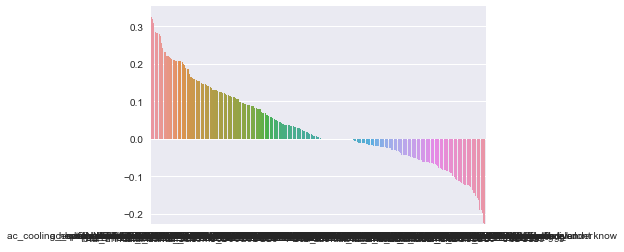

In [20]:
cm[0].shape

ploty = cm[0].reshape(1,263)
# reshape the first row of the correlation matrix to get the sort of principle component

ploty;

plotx = cols

plotx;

plot1 = pd.DataFrame(data=ploty,columns=plotx)

plot1

plot = plot1.sort_values(by=0, ascending=False, axis=1)
# sort the first row by means of ascending

plot

plot2 = plot.ix[:,1:]

# save the csv file that have all feature corelations gotten from EDA
plot2.to_csv('data/output/feature_importances_EDA.csv')

ax = sns.barplot(data=plot2)
# plot the corelation martrix all accordingly

### select the factors that have zero or under 0.05 impact on y

In [9]:
# plot the factors that are related to y under 0.05 scale

plot3 = cm_save.iloc[:,0]

plot3 = pd.DataFrame(data=plot3,columns=['electricity_consumption'])
# create a dataframe using features a row so that selection query can be designed more easily

plot3;

### Either excute the 1+2 part or excute 1+3 part of the codes

In [10]:
plot3 = plot3.loc[plot3['electricity_consumption'] == 0]
 # select the factor that has zero impact on y   

plot3

plot3.shape

(19, 1)

,ozone_error,residents_19_to_24,Number_of_Heat_Recovery_Systems__c,Number_of_Gas_Space_Heaters__c,Number_of_Wall_Furnaces__c,heating_none,hvac_no_ac,hvac_ductless,hvac_geothermal_heat_pump,precip_intensity_error,temperature_error,cloud_cover_error,wind_speed_error,pressure_error,apparent_temperature_error,visibility_error,humidity_error,dew_point_error,Number_of_Manual_Thermostats__c
electricity_consumption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


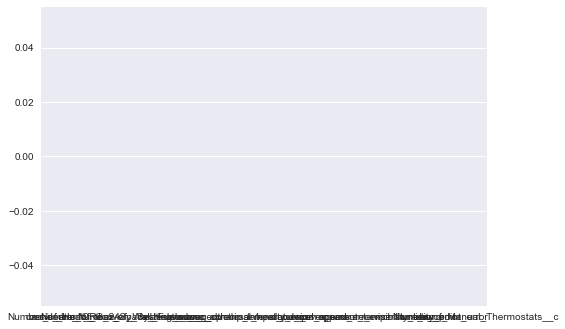

In [11]:
 plot3 = plot3.loc[(plot3['electricity_consumption'] <= 0.05) & (plot3['electricity_consumption'] >= -0.05)]
# # select the factors that have less than 0.05 linear relationship with y

plot3;

plot3 = plot3.T

plot3;

plot3 = plot3.sort_values(by='electricity_consumption', ascending=False, axis=1)
# sort the first row by means of ascending

ax = sns.barplot(data=plot3);
# plot the factors as bar chart

plot3

### the top 10 factors

,Conditioned_Square_Footage__c,House_Volume_Cubic_Footage__c,electric_ovenrange_number,sprinklersystem_number,ceilingfan_number,Number_of_Bedrooms__c,house_square_feet,electricvehicle_number,residents_13_to_18,irrigation_system_Yes
0,0.325674,0.319947,0.308955,0.283729,0.28252,0.281808,0.278498,0.273004,0.254367,0.243451


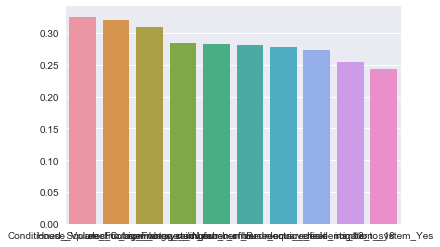

In [22]:
plota = plot.ix[:,1:11]
# select the first 5 columns in the table (five factors that are mostly positive linear corelated with y)
# note that the first column should be excluded because it is itself

ax = sns.barplot(data=plota)
# plot the first 10 columns that are positively related to y

# save the csv file that have top 10 features that are positively linear to y
plota.to_csv('data/output/top10_positive_linear_feature_EDA.csv')

plota

### the last 10 factors

,irrigation_system_No,pv_system_own_No,Significant_Shade__c,ACH50_Calculation__c,Attic_Insulation_Secured__c,spend_time_at_home_none_none,Distance_From_Neighbors__c_0,programmable_thermostat_currently_programmed_I dont know,reduce_energy_cost_Yes,Type_of_Home__c_Town Home
0,0.226489,0.223425,0.19901,0.19085,0.190005,0.163573,0.158004,0.152669,0.144755,0.144038


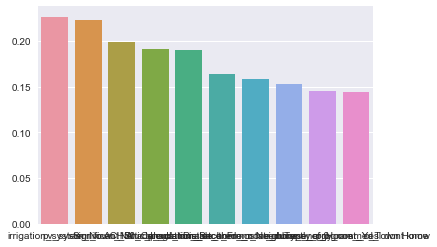

In [23]:
plotb = plot.ix[:,-10:]
# select the last 10 columns in the table (five factors that are mostly negative linear corelated with y)

plotb

plotb = plotb.abs()
# covert the numerical values to abs

plotb = plotb.sort_values(by=0, ascending=False, axis=1)
# sort the first row by means of ascending

# save the csv file that have top 10 features that are negatively linear to y
plotb.to_csv('data/output/top10_negative_linear_feature_EDA.csv')

ax = sns.barplot(data=plotb)
# plot the last 10 columns that are negatively related to y

plotb